In [81]:
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.utils.data as data_utils

import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pickle
import os

In [85]:
#Reading Image through Pickle (only training data)
def ImageToArray(train):
        filePath = './Datasets/CIFAR10/cifar-10-batches-py/'
        listOfTestFiles = os.listdir(path=filePath)
        temp = []
        tempLabels = []
        
        if(train == True):
            print(listOfTestFiles[1:6])
    #         For collecting Training data:
            for file in listOfTestFiles[1:6]:
                with open(filePath+file,'rb') as fo:
                    dict = pickle.load(fo,encoding='bytes')
                    temp.append(dict[b'data'])
                    tempLabels.append(dict[b'labels'])
        else:
            print(listOfTestFiles[7])
            #for collecting Testing data
            with open(filePath+listOfTestFiles[7],'rb') as fo:
                    dict = pickle.load(fo,encoding='bytes')
                    temp.append(dict[b'data'])
                    tempLabels.append(dict[b'labels'])
        
        dictData = {}
        dictData['label'] = np.array(tempLabels)
        dictData['data'] = np.array(temp)
        return dictData

In [86]:
tempDict = ImageToArray(train=True)

['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']


In [87]:
tempDict['data'].shape

(5, 10000, 3072)

In [88]:
tempDict['data'] = np.reshape(tempDict['data'],(tempDict['data'].shape[0]*tempDict['data'].shape[1],tempDict['data'].shape[2]))
tempDict['label'] = np.reshape(tempDict['label'],(tempDict['label'].shape[0]*tempDict['label'].shape[1],1))

In [89]:
print("Data shape = ",tempDict['data'].shape)   #no. of samples x no. of features
print("Labels shape = ",tempDict['label'].shape)     #no. of samples x label

Data shape =  (50000, 3072)
Labels shape =  (50000, 1)


In [90]:
#For training dataset:
data = torch.from_numpy(tempDict['data'])
label = torch.from_numpy(tempDict['label'])

#conversion from tensor value to one hot tensor value
# print(label)
# oneHot = torch.FloatTensor(label.size(0),10).zero_()
# target = oneHot.scatter_(1,label,1)
# print(target[0])

data_4d = data.view(data.size()[0],3,32,32)  #converting the single image into 4d tensor.

train = data_utils.TensorDataset(data_4d,label)
train_loader = data_utils.DataLoader(train, batch_size=100, shuffle=False)

In [92]:
#For testing dataset:
tempDict_test = ImageToArray(train=False)
print("Shape of data label = ",tempDict_test['data'].shape)

tempDict_test['data'] = np.reshape(tempDict_test['data'],(tempDict_test['data'].shape[0]*tempDict_test['data'].shape[1],tempDict_test['data'].shape[2]))
tempDict_test['label'] = np.reshape(tempDict_test['label'],(tempDict_test['label'].shape[0]*tempDict_test['label'].shape[1],1))

print("Data shape = ",tempDict_test['data'].shape)   #no. of samples x no. of features
print("Labels shape = ",tempDict_test['label'].shape)     #no. of samples x label

data_test = torch.from_numpy(tempDict_test['data'])
label_test = torch.from_numpy(tempDict_test['label'])

#conversion from tensor value to one hot tensor value
# print(label)
# oneHot = torch.FloatTensor(label.size(0),10).zero_()
# target = oneHot.scatter_(1,label,1)
# print(target[0])

data_4d_test = data_test.view(data_test.size()[0],3,32,32)  #converting the single image into 4d tensor.

test = data_utils.TensorDataset(data_4d_test,label_test)
Test_loader = data_utils.DataLoader(test, batch_size=100, shuffle=False)

test_batch
Shape of data label =  (1, 10000, 3072)
Data shape =  (10000, 3072)
Labels shape =  (10000, 1)


In [95]:
#Size of each sample and label. TRAINING DATASET
print("Size of first image = ",train_loader.dataset[0][0].size())
print("Label of first Image = ",train_loader.dataset[0][1])

Size of first image =  torch.Size([3, 32, 32])
Label of first Image =  tensor([ 6])


In [96]:
#Size of each sample and label. TESTING DATASET
print("Size of first image = ",Test_loader.dataset[0][0].size())
print("Label of first Image = ",Test_loader.dataset[0][1])

Size of first image =  torch.Size([3, 32, 32])
Label of first Image =  tensor([ 3])


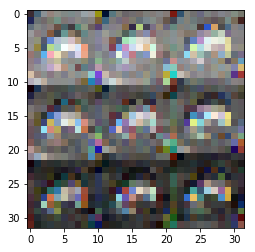

In [97]:
#visualizing first Image TRAIN SET
plt.imshow(train_loader.dataset[0][0].view(32,32,-1))

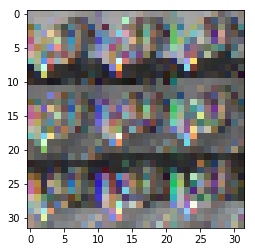

In [98]:
#visualizing first Image TEST SET
plt.imshow(Test_loader.dataset[0][0].view(32,32,-1))

In [99]:
# buidling ConvNet.
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        # 3 input channel, 6 output channel, with 5x5 kernels
        self.conv1 = nn.Conv2d(3,6,5).double()
        self.conv2 = nn.Conv2d(6,28,5).double()
        self.conv3 = nn.Conv2d(28,32,3).double()
        self.conv4 = nn.Conv2d(32,64,3).double()
        #fc linear operation
        self.fc1 = nn.Linear(64,128).double()
        self.fc2 = nn.Linear(128,64).double()
        self.fc3 = nn.Linear(64,10).double()
        self.knowTheLastMaxPoolSize = False
        
    def forward(self,x):
        x = x.double()
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)),1)
        x = F.max_pool2d(F.relu(self.conv4(x)),1)
        
        if(self.knowTheLastMaxPoolSize==True):
            print(x.size())
            return
        
        x = x.view(x.size(0),-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
        

In [100]:
n1 = Net()

In [102]:
print(n1)
print(n1.knowTheLastMaxPoolSize)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 28, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(28, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)
False


In [106]:
#perfomring NN computations:
# conv2d => relu => Maxpool2d => conv2d => relu => MaxPool2d => fc1 => fc2 => fc3
# forward => loss => backward => update_weights

#Deicde gradient descent optimizer
optimizer = torch.optim.SGD(n1.parameters(),lr=0.001,momentum=0.9)

#To know the size of data at last max pool:
n1.knowTheLastMaxPoolSize = False
#decide the loss function
criterion = nn.CrossEntropyLoss() 

totalLoss = []
tempLoss = 0
correct = 0
total = 0
count = 0

for i in range(50):    #no. of epochs = 5
    for image,label in train_loader:
        optimizer.zero_grad()   #zeroing the gradient buffer
        
        #forward + loss
        output = n1.forward(image)
        output = output.squeeze()
        label = label.squeeze()
        loss = criterion(output,label)
        
        #accumulating and printing the loss.
        tempLoss = loss        
        if(count%10 == 0):
            print("Loss = ",loss,end="\r")
        
        #Calculating accuracy
        _, predictIndex = torch.max(output,1)
        correct += (predictIndex == label).sum().item()
        total += label.size(0)
        
        #Backpropogation + updating weights
        loss.backward()
        optimizer.step()
        count+=1
        
    totalLoss.append(tempLoss)

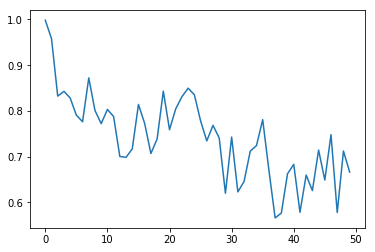

In [107]:
plt.plot(totalLoss)

In [108]:
print([x.detach().numpy() for x in totalLoss])
print("Accuracy Train = ",100*(correct/total))

[array(0.99832426), array(0.95824013), array(0.83236181), array(0.84281374), array(0.82841998), array(0.79085281), array(0.77633795), array(0.87219442), array(0.80090179), array(0.77225414), array(0.8032738), array(0.78768372), array(0.70031886), array(0.69850363), array(0.71691108), array(0.81416751), array(0.7725149), array(0.70686029), array(0.7384704), array(0.84317718), array(0.75894297), array(0.8046386), array(0.83122643), array(0.84973053), array(0.83529938), array(0.77836118), array(0.73447468), array(0.76854207), array(0.74073465), array(0.61997874), array(0.74282112), array(0.62293533), array(0.64566961), array(0.71213097), array(0.72420304), array(0.78081913), array(0.6704274), array(0.56601461), array(0.57658927), array(0.66265634), array(0.68313325), array(0.57828019), array(0.65975321), array(0.62584633), array(0.71438228), array(0.64889269), array(0.74801943), array(0.57785333), array(0.71227977), array(0.66628166)]
Accuracy Train =  72.23512


In [109]:
# For test set:
optimizer = torch.optim.SGD(n1.parameters(),lr=0.001,momentum=0.9)

#To know the size of data at last max pool:
n1.knowTheLastMaxPoolSize = False
#decide the loss function
criterion = nn.CrossEntropyLoss() 

correct_test = 0
total_test = 0

for image,label in Test_loader:
        output = n1.forward(image)
        output = output.squeeze()
        label = label.squeeze()
        loss = criterion(output,label)
        
        #accumulating and printing the loss.
        tempLoss = loss        
        if(count%10 == 0):
            print("Loss = ",loss,end="\r")
        
        #Calculating accuracy
        _, predictIndex_test = torch.max(output,1)
        correct_test += (predictIndex_test == label).sum().item()
        total_test += label.size(0)

In [110]:
print("Accuracy Test = ",100*(correct_test/total_test))

Accuracy Test =  53.620000000000005
